Agglomerative clustering works in a “bottom-up” manner. That is, each object is initially considered as a single-element cluster (leaf). At each step of the algorithm, the two clusters that are the most similar are combined into a new bigger cluster (nodes). This procedure is iterated until all points are member of just one single big cluster (root) (see figure below).

The inverse of agglomerative clustering is divisive clustering, which is also known as DIANA (Divise Analysis) and it works in a “top-down” manner. It begins with the root, in which all objects are included in a single cluster. At each step of iteration, the most heterogeneous cluster is divided into two. The process is iterated until all objects are in their own cluster (see figure below).

In [1]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
 
# randomly chosen dataset
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
 
# here we need to mention the number of clusters
# otherwise the result will be a single cluster
# containing all the data
clustering = AgglomerativeClustering(n_clusters = 2).fit(X)
 
# print the class labels
print(clustering.labels_)

[1 1 1 0 0 0]


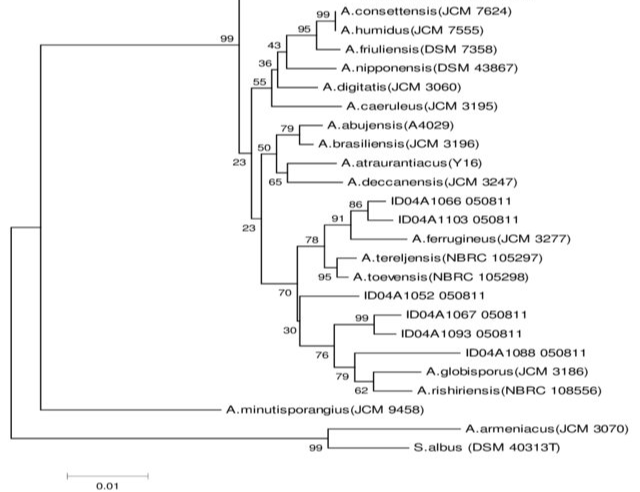

In [2]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\ac1.png')

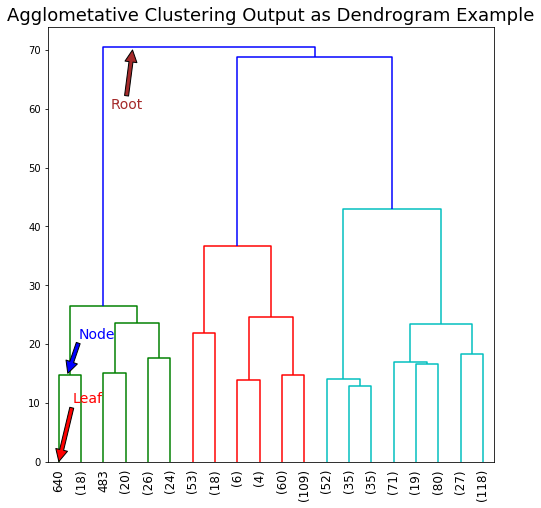

In [3]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\ac2.png')

Agglomerative Clustering or bottom-up clustering essentially started from an individual cluster (each data point is considered as an individual cluster, also called leaf), then every cluster calculates their distance with each other. The two clusters with the shortest distance with each other would merge creating what we called node. Newly formed clusters once again calculating the member of their cluster distance with another cluster outside of their cluster. The process is repeated until all the data points assigned to one cluster called root. The result is a tree-based representation of the objects called dendrogram

# Distance Measurements

We begin the agglomerative clustering process by measuring the distance between the data point. How it is calculated exactly? Let me give an example with dummy data.

In [4]:
#creating dummy data
import pandas as pd
dummy = pd.DataFrame([[30,100,5],
              [18, 200, 2],
              [35, 150, 7],
             [48, 300, 4],
             [50, 200, 6]], index = ['Anne', 'Ben', 'Chad', 'Dave', 'Eric'], columns =['Age', 'Expense($)', 'Distance(KM)'])

Let’s say we have 5 different people with 3 different continuous features and we want to see how we could cluster these people. First thing first, we need to decide our clustering distance measurement.

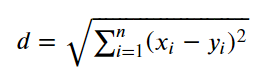

In [5]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\ac3.png')

# Euclidean distance

In [18]:
np.round(distance_matrix(dummy.values, dummy.values), 2)

array([[  0.  , 100.78,  50.29, 200.81, 102.  ],
       [100.78,   0.  ,  53.08, 104.43,  32.25],
       [ 50.29,  53.08,   0.  , 150.6 ,  52.25],
       [200.81, 104.43, 150.6 ,   0.  , 100.04],
       [102.  ,  32.25,  52.25, 100.04,   0.  ]])

In [6]:
import numpy as np
from scipy.spatial import distance_matrix
#distance_matrix from scipy.spatial would calculate the distance between data point based on euclidean distance, and I round it to 2 decimal
pd.DataFrame(np.round(distance_matrix(dummy.values, dummy.values), 2), index = dummy.index, columns = dummy.index)

,Anne,Ben,Chad,Dave,Eric
Anne,0.00,100.76,50.29,200.81,101.99
Ben,100.76,0.00,53.05,104.42,32.25
Chad,50.29,53.05,0.00,150.59,52.21
Dave,200.81,104.42,150.59,0.00,100.04
Eric,101.99,32.25,52.21,100.04,0.00


After that, we merge the smallest non-zero distance in the matrix to create our first node. In this case, it is Ben and Eric.

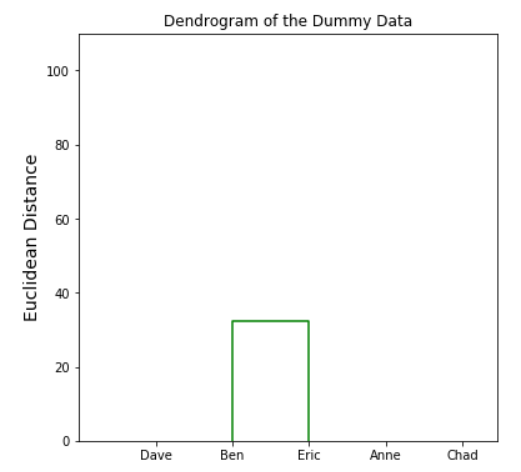

In [7]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\ac4.png')

# Linkage Criterion

The linkage criterion is where exactly the distance is measured. It is a rule that we establish to define the distance between clusters.

There are many linkage criterion out there, but for this time I would only use the simplest linkage called Single Linkage. How it is work? I would show it in the picture below.

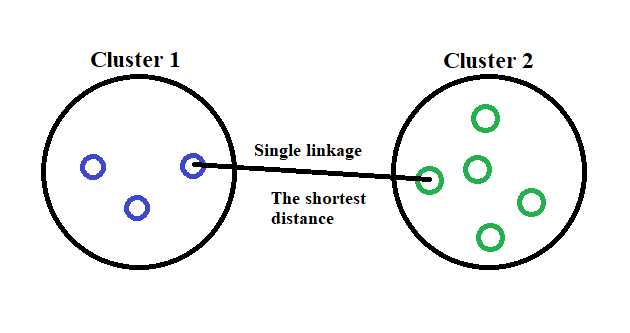

In [8]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\ac5.png')

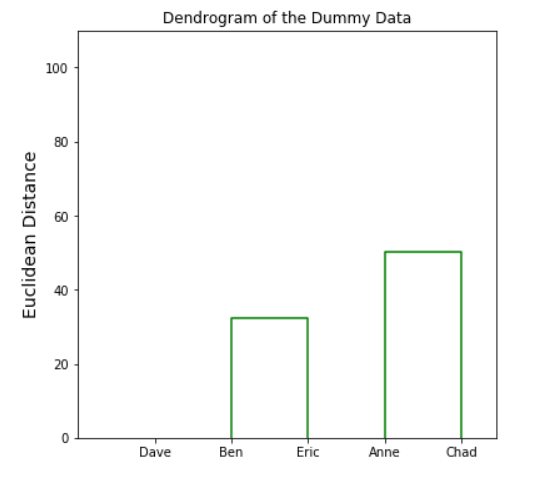

In [9]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\ac6.png')

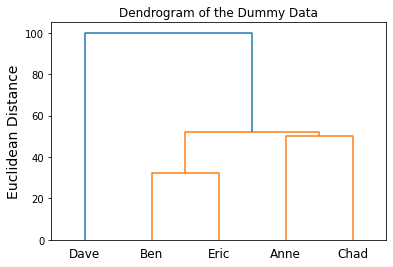

In [10]:
#importing linkage and denrogram from scipy
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
#creating dendrogram based on the dummy data with single linkage criterion
den = dendrogram(linkage(dummy, method='single'), 
labels = dummy.index)
plt.ylabel('Euclidean Distance', fontsize = 14)
plt.title('Dendrogram of the Dummy Data')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
aglo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
aglo.fit_predict(dummy)

array([0, 2, 0, 1, 2], dtype=int64)

In [12]:
dummy['Aglo-label'] = aglo.fit_predict(dummy)

In [13]:
dummy

,Age,Expense($),Distance(KM),Aglo-label
Anne,30,100,5,0
Ben,18,200,2,2
Chad,35,150,7,0
Dave,48,300,4,1
Eric,50,200,6,2


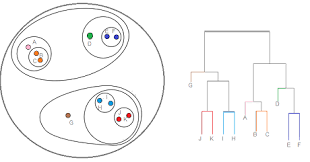

In [14]:
from IPython.display import Image
Image(filename='C:\\Users\\uttam.grade\\Downloads\\ac7.png')